In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
data = pd.read_csv("C:/Users/raash/Downloads/50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


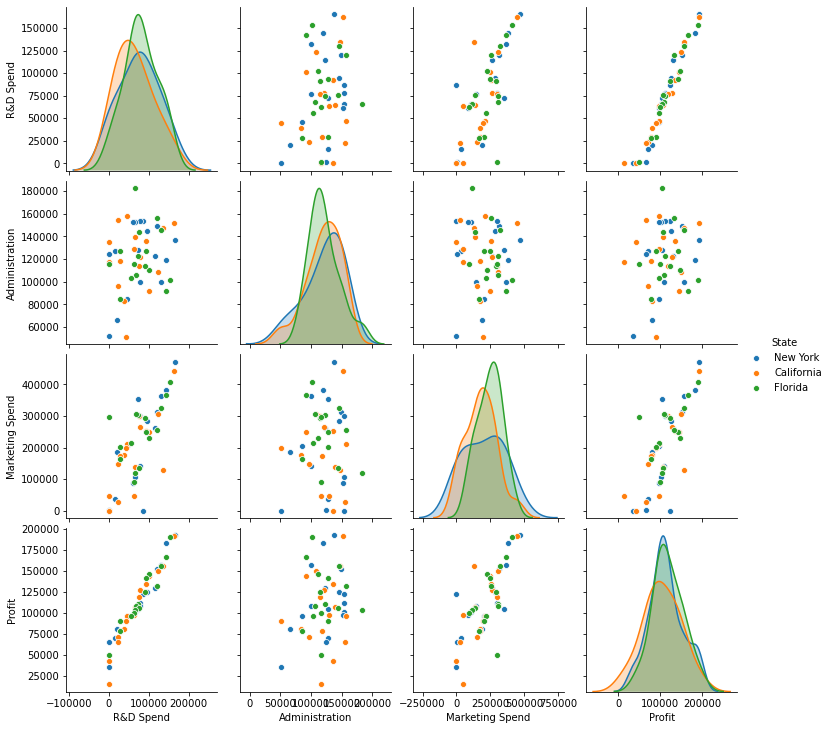

In [161]:
sns.pairplot(data=data, hue = 'State')

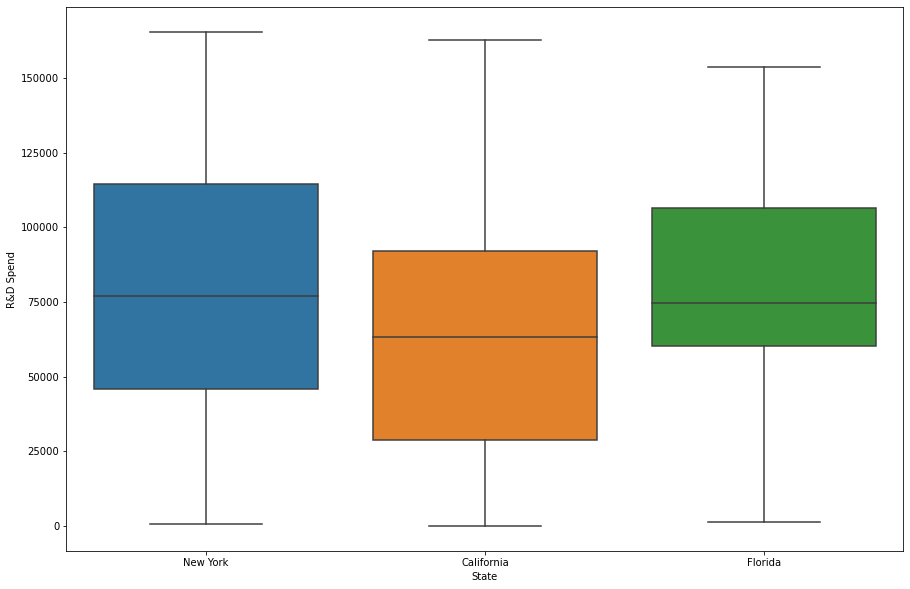

In [169]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State',y='R&D Spend',data=data)

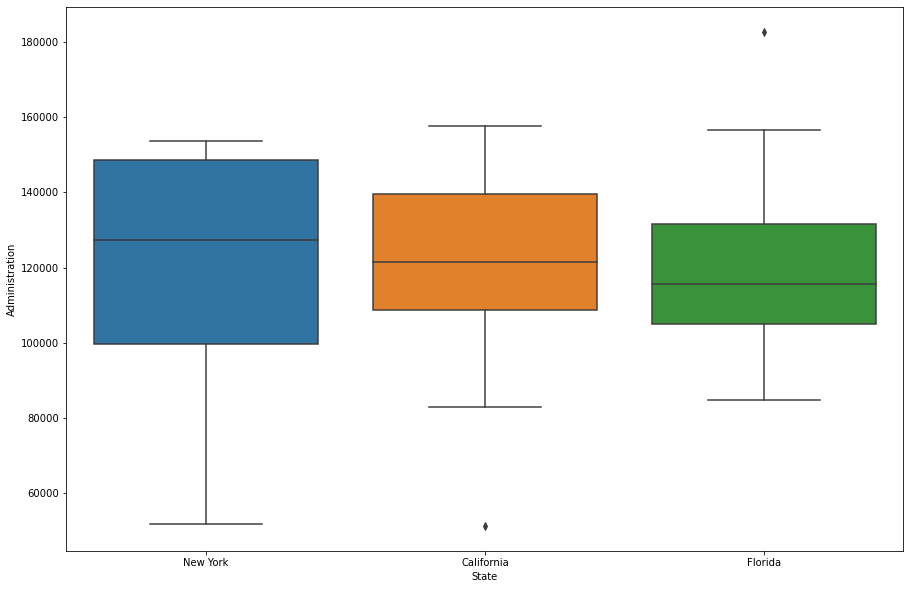

In [170]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State',y='Administration',data=data)

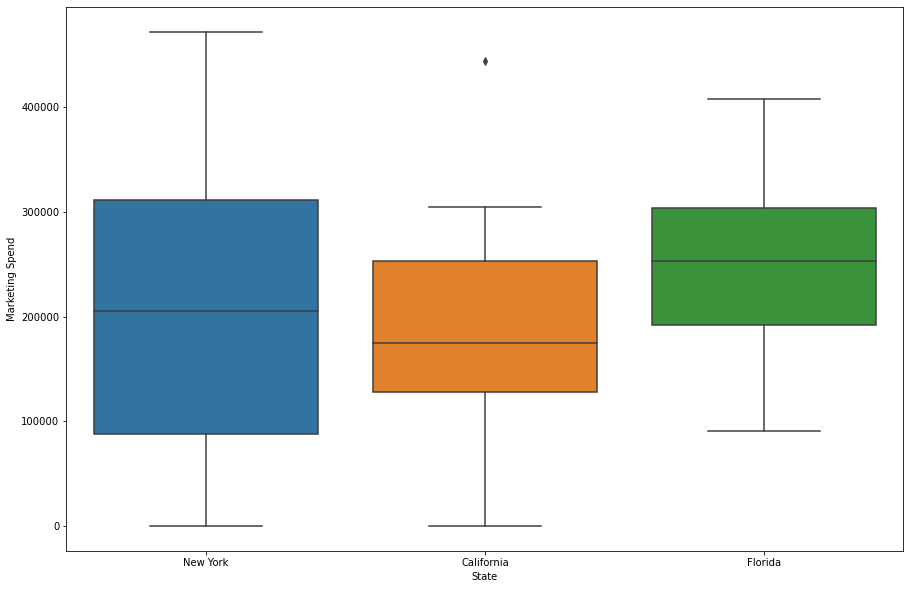

In [171]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State',y='Marketing Spend',data=data)

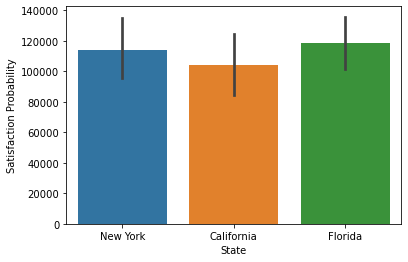

In [173]:
def barchart(feature):
    g = sns.barplot(x=feature,y="Profit",data=data)
    g = g.set_ylabel("Satisfaction Probability")
barchart('State')

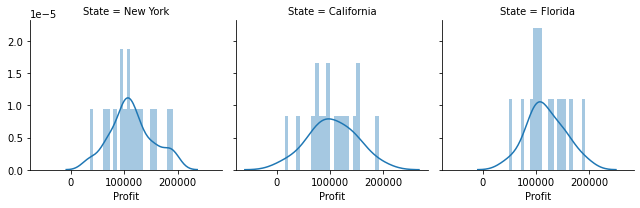

In [175]:
g = sns.FacetGrid(data, col = "State")
g.map(sns.distplot, "Profit", bins = 25)
plt.show()

# Linear Regression

In [145]:
X = data['Marketing Spend'].values.reshape(-1,1)
y = data['Profit'].values.reshape(-1,1)


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [147]:

X_train.shape

(37, 1)

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:

regressor = LinearRegression(fit_intercept =True)

In [150]:
regressor.fit(X_train,y_train)


LinearRegression()

In [151]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[0.2092683]]
Linear Model Coefficient (b):  [70458.94067926]


In [152]:

y_predict = regressor.predict( X_test)
y_predict

array([[138236.06290791],
       [ 79912.23015062],
       [134237.3746952 ],
       [123333.7010464 ],
       [107080.74668897],
       [ 70458.94067926],
       [132176.25772571],
       [132959.94658233],
       [115375.20248574],
       [135669.72413055],
       [163352.83141856],
       [112548.40838222],
       [146394.320617  ]])

In [153]:

y_test

array([[155752.6 ],
       [ 14681.4 ],
       [108733.99],
       [134307.35],
       [ 81005.76],
       [ 35673.41],
       [124266.9 ],
       [118474.03],
       [ 96778.92],
       [152211.77],
       [191792.06],
       [ 90708.19],
       [156991.12]])

Text(0.5, 1.0, 'Marketing Spend vs. Profit')

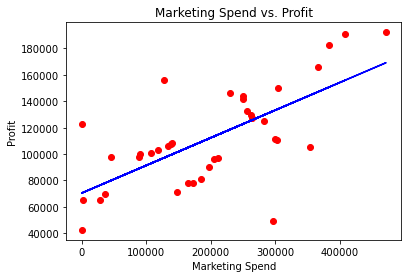

In [154]:

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Profit')
plt.xlabel('Marketing Spend')
plt.title('Marketing Spend vs. Profit')

Text(0.5, 1.0, 'Marketing Spend vs. Profit')

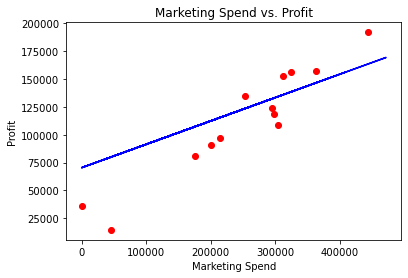

In [155]:

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Profit')
plt.xlabel('Marketing Spend')
plt.title('Marketing Spend vs. Profit')

In [156]:

y_predict = regressor.predict(X_test)
y_predict

array([[138236.06290791],
       [ 79912.23015062],
       [134237.3746952 ],
       [123333.7010464 ],
       [107080.74668897],
       [ 70458.94067926],
       [132176.25772571],
       [132959.94658233],
       [115375.20248574],
       [135669.72413055],
       [163352.83141856],
       [112548.40838222],
       [146394.320617  ]])

# Multiple regresssion

In [159]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[70458.94067926]
[[0.2092683]]


In [160]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22961.135943817244
Mean Squared Error: 731739207.1328771
Root Mean Squared Error: 27050.678496719396


# Ploynomial regression

In [69]:
X = data['Marketing Spend'].values.reshape(-1,1)
y = data['Profit'].values.reshape(-1,1)

In [70]:
y_pred=regressor.predict(X)

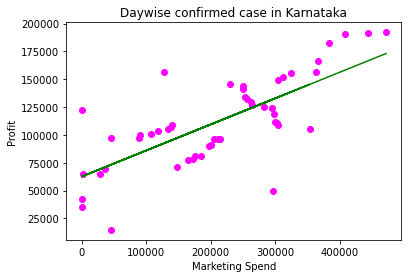

In [72]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Daywise confirmed case in Karnataka')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly=PolynomialFeatures(degree = 2)

In [75]:
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

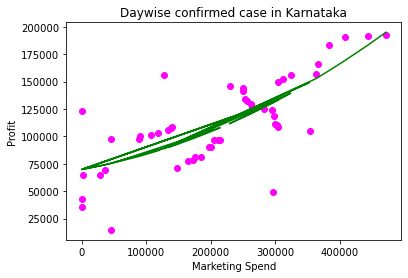

In [76]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'green')
plt.title('Daywise confirmed case in Karnataka')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE is ' + str(rmse))
print('r2 is ' +str(r2))

RMSE is 25882.714151353004
r2 is 0.5792246702794586


In [79]:
regressor.predict(poly.fit_transform([[6.5]]))

array([[69820.30585978]])

In [80]:
regressor.coef_

array([[0.00000000e+00, 1.04095445e-01, 3.41732426e-07]])

# Decision Tree

In [121]:
#feature selection
X = pd.DataFrame(data,columns=['R&D Spend','Administration','Marketing Spend','Profit'])
y = pd.DataFrame(data,columns=['State'])

In [122]:
y

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [124]:
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()

In [125]:
classification = classification.fit(X_train,y_train)

In [126]:
y_pred = classification.predict(X_test)

In [127]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.15384615384615385


In [128]:
from sklearn.tree import export_graphviz
from six import StringIO

In [129]:
print(data.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [130]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


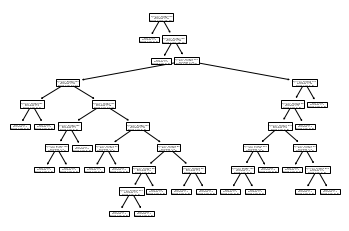

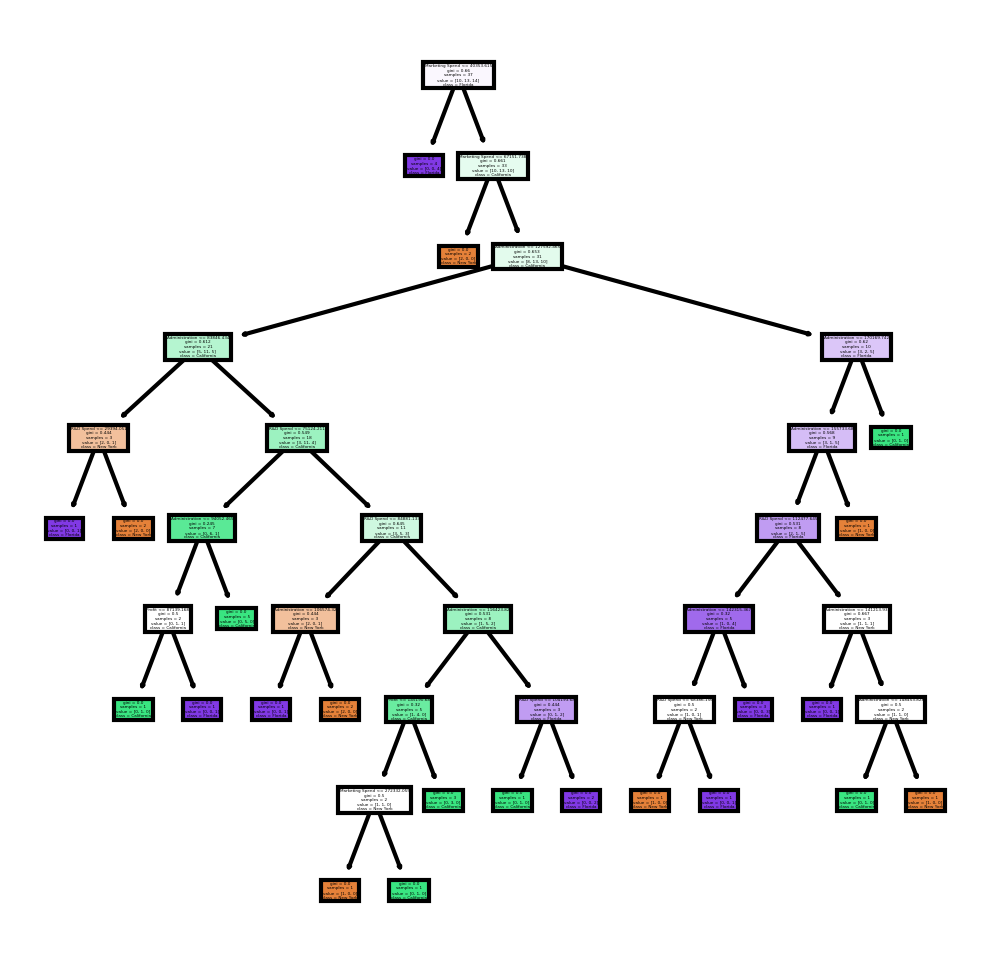

In [134]:
from sklearn import tree
tree.plot_tree(classification)


import matplotlib.pyplot as plt
fn=['R&D Spend','Administration','Marketing Spend','Profit']
cn=['New York','California','Florida']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classification,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')